In [1]:
import mcmc
import read_mcmc
from importlib import reload

# Log Likelihood
$\log{\mathcal{L}(\Theta)} = \sum_{v_c, v}(\hat{y}_{v_c,v}-y_{v_c,v})^2$  
$y = 4\pi v^2 f(v, v_c)$  
$\Theta = \langle D, e, H, j, k\rangle$

$f(v)=\frac{1}{N(v_0,v_\mathrm{damp})}\exp\left(-\frac{v^2}{v_0^{2}}\right)\mathcal{S}(v_\mathrm{damp}-v)$  
$\mathcal{S}(v_\mathrm{damp}-v)=\frac{1}{1+\exp(-k(v_\mathrm{damp}-v))}$  

$v_0=D\left(\frac{v_\mathrm{c}}{100\,\mathrm{km\,s^{-1}}}\right)^e$  
$v_\mathrm{damp}=H\left(\frac{v_\mathrm{c}}{100\,\mathrm{km\,s^{-1}}}\right)^j$

In [20]:
def show_sigmoid_damped(
        samples_fname, 
        param_keys, 
        log_prior_fn=None, 
        rng=None, 
        log_prior_fn_args=()
):
    read_mcmc.estimate(samples_fname)
    read_mcmc.corner_plot(
        samples_fname,
        param_keys,
        consider_burnin=True,
        log_prior_function=log_prior_fn,
        rng=rng,
        log_prior_function_args=log_prior_fn_args
    )
    read_mcmc.trace_plot(samples_fname, param_keys)
    return None

# Uniform priors

## Narrow Uniform Prior

### Fixed

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

tau: [191.6915919  248.24449551 241.26120794 229.63023641  67.57567878]
burn-in: 496
thin: 33
samples shape: (539, 64, 5)

Sampling prior


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:51<00:00, 195.97it/s]


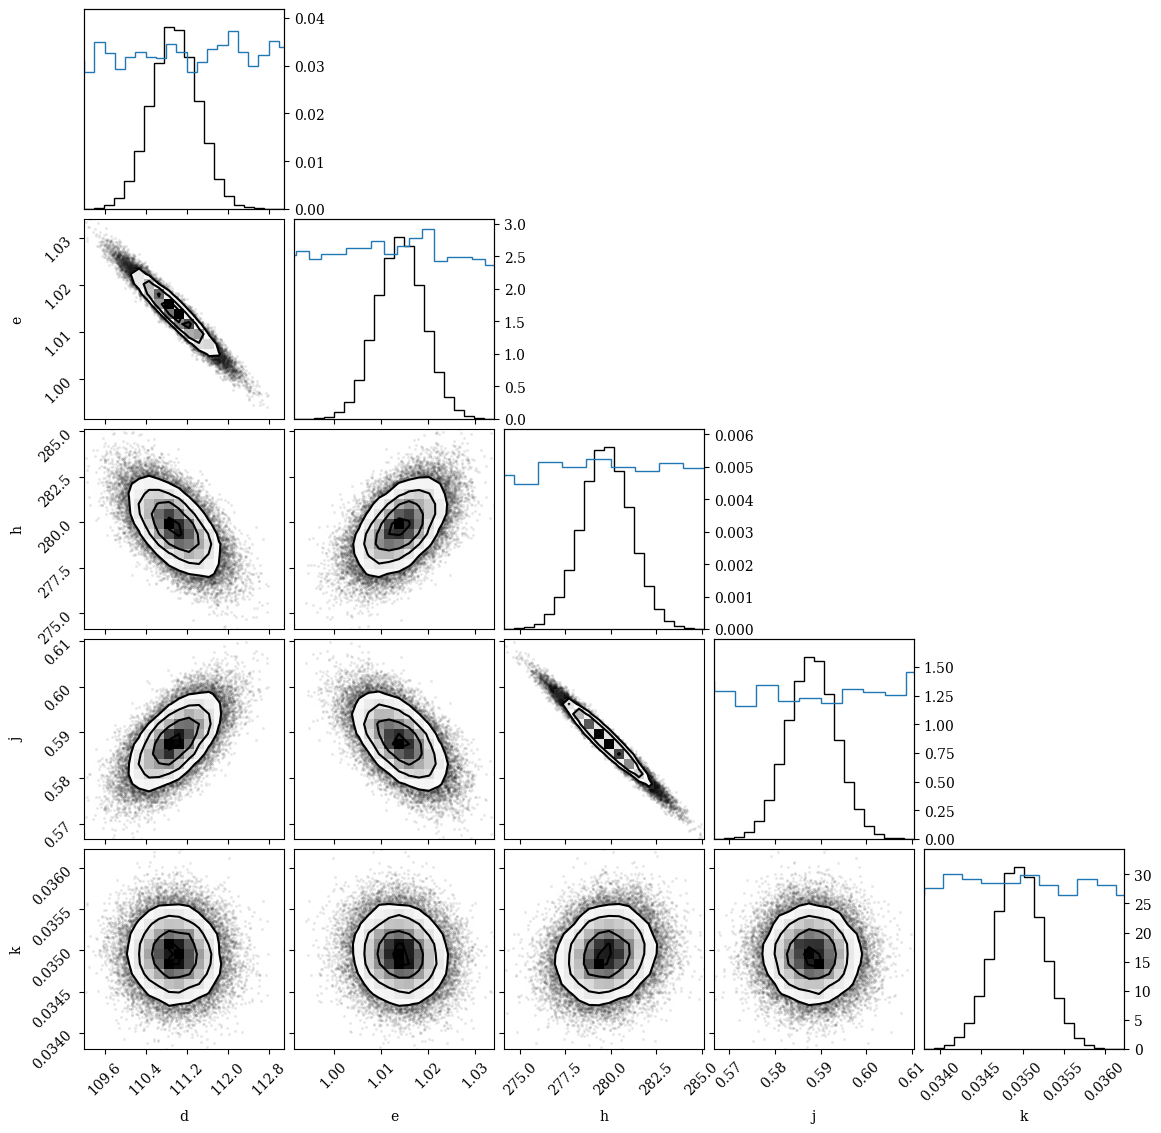

tau: [191.6915919  248.24449551 241.26120794 229.63023641  67.57567878]
burn-in: 496
thin: 33
samples shape: (539, 64, 5)


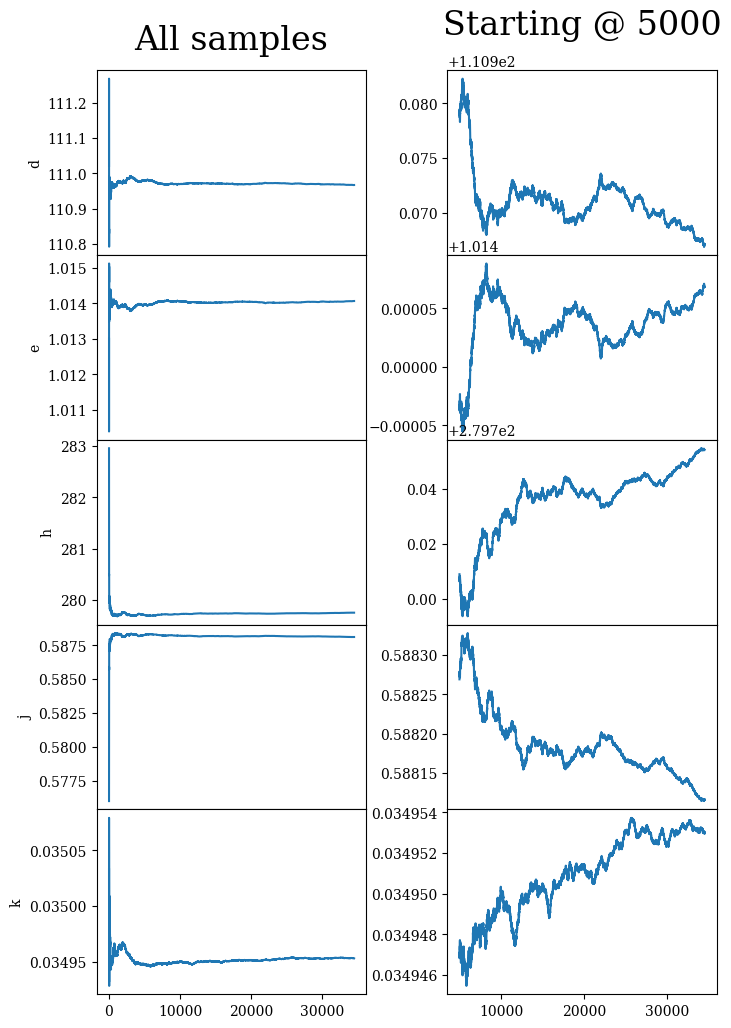

In [10]:
reload(read_mcmc)
show_sigmoid_damped('mcmc_samples_narrower_uniform_prior_20240606.h5',
     param_keys=['d', 'e', 'h', 'j', 'k'],
     log_prior_fn=mcmc.calc_log_narrower_uniform_prior)

# Wide Gaussian prior

## Fixed

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

tau: [ 49.60496834  62.2454281  186.79898063 187.27216599  38.21636265]
burn-in: 374
thin: 19
samples shape: (691, 64, 5)



Sampling prior


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:04<00:00, 154.57it/s]


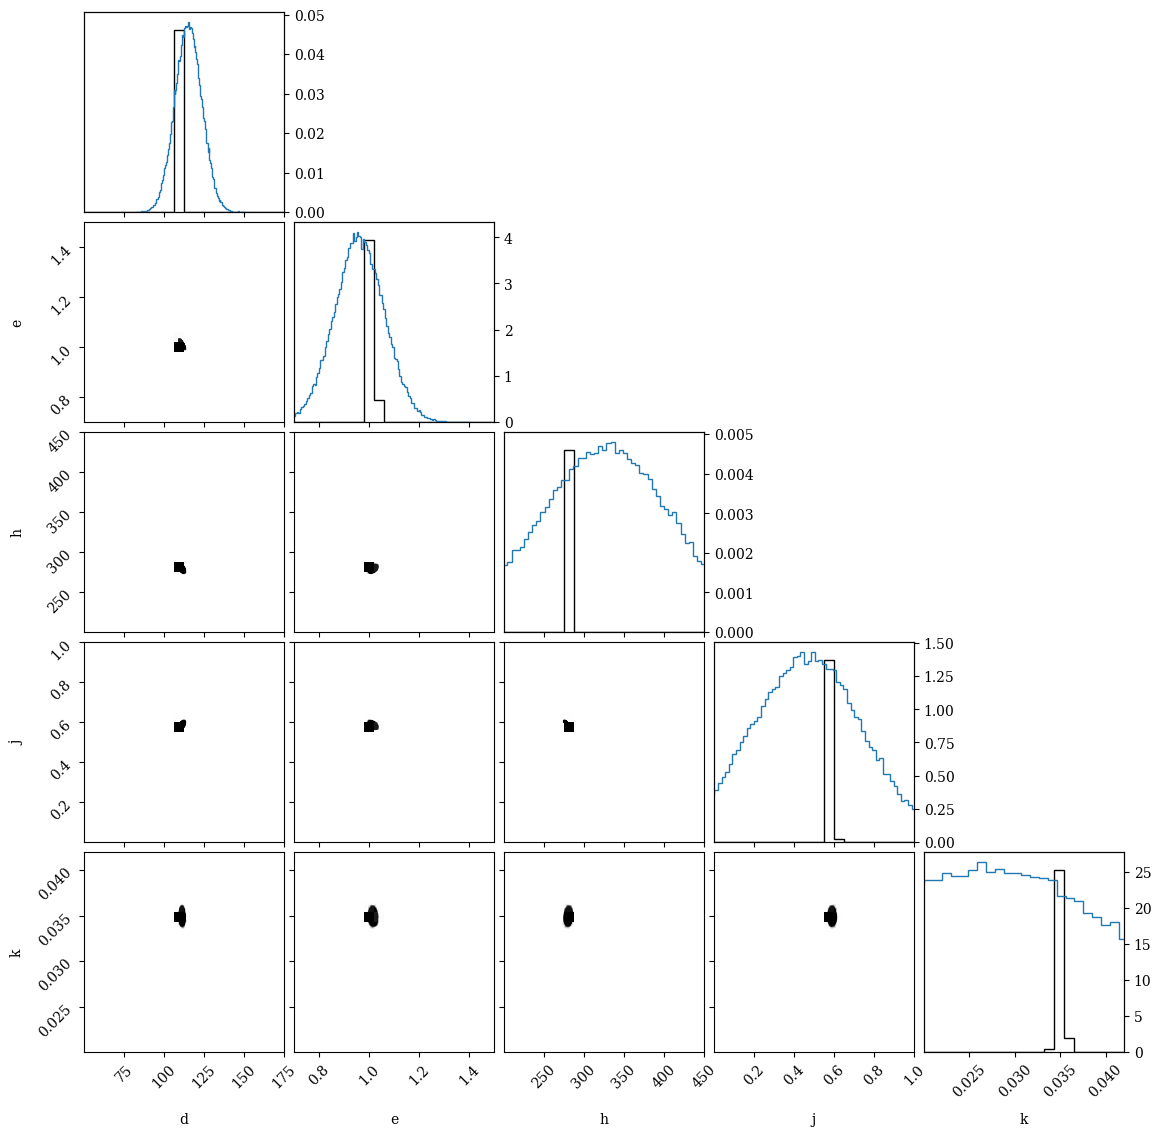

tau: [ 49.60496834  62.2454281  186.79898063 187.27216599  38.21636265]
burn-in: 374
thin: 19
samples shape: (691, 64, 5)


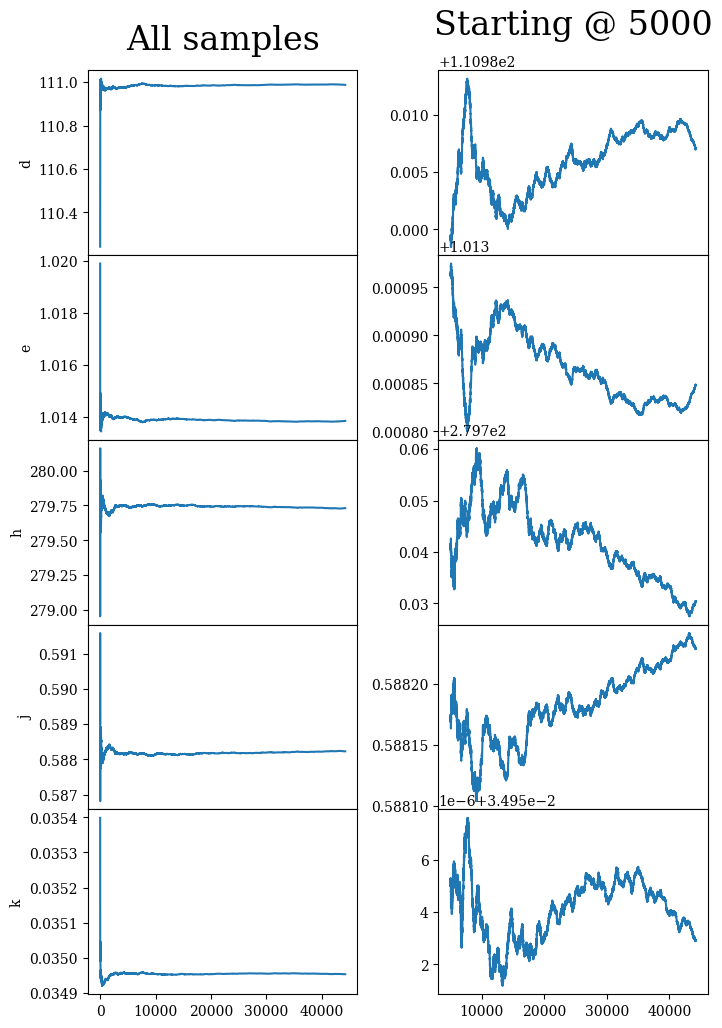

In [18]:
reload(read_mcmc)
show_sigmoid_damped('mcmc_samples_wide_gaussian_prior_20240606.h5',
     param_keys=['d', 'e', 'h', 'j', 'k'],
     log_prior_fn=mcmc.calc_log_wide_gaussian_prior,
     rng=[(50., 175.), (0.7, 1.5), (200., 450.), (0., 1.), (2.e-2, 4.2e-2)],
     log_prior_fn_args=('ls_results_raw.pkl',))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

tau: [ 49.60496834  62.2454281  186.79898063 187.27216599  38.21636265]
burn-in: 374
thin: 19
samples shape: (691, 64, 5)
Sampling prior


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:19<00:00, 512.63it/s]


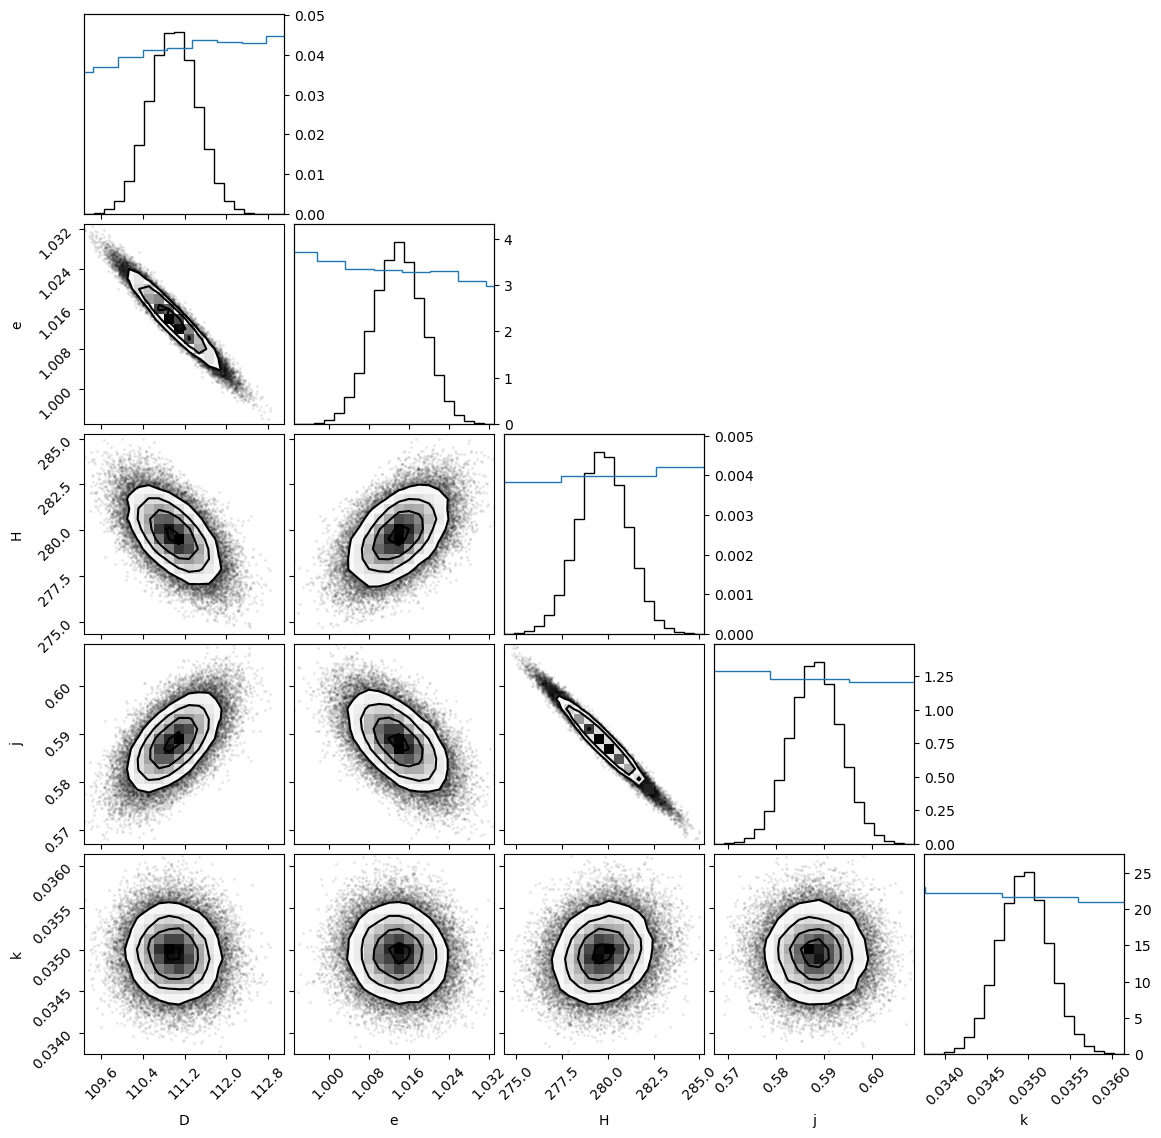

tau: [ 49.60496834  62.2454281  186.79898063 187.27216599  38.21636265]
burn-in: 374
thin: 19
samples shape: (691, 64, 5)


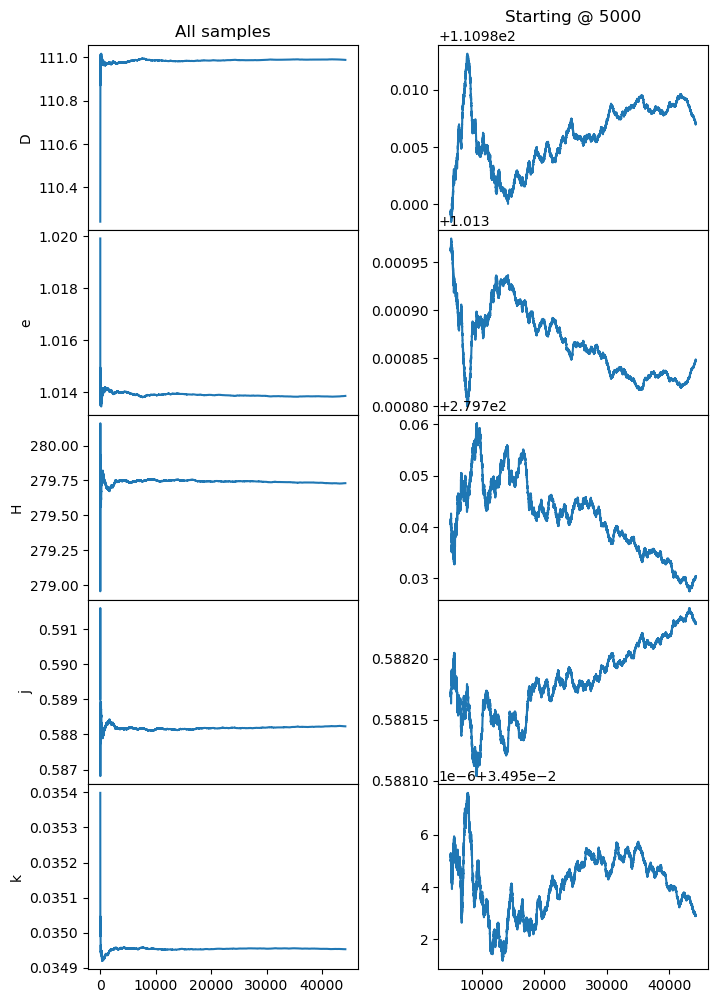

In [7]:
reload(read_mcmc)
show_sigmoid_damped('mcmc_samples_wide_gaussian_prior_20240606.h5',
     param_keys=['d', 'e', 'h', 'j', 'k'],
     log_prior_fn=mcmc.calc_log_wide_gaussian_prior,
     log_prior_fn_args=('ls_results_raw.pkl',))

# Mao

tau: [54.68612942 49.54260445 31.66900138]
burn-in: 109
thin: 15
samples shape: (5148, 64, 3)


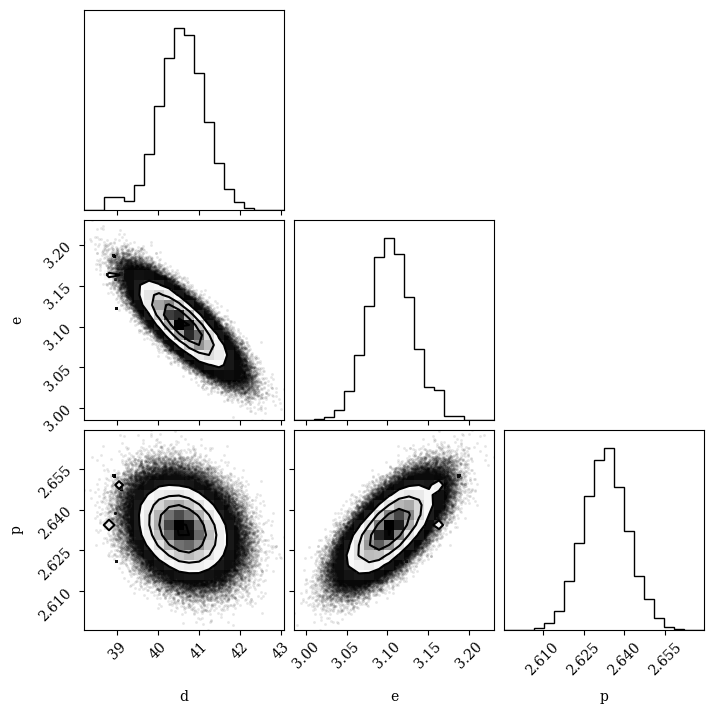

tau: [54.68612942 49.54260445 31.66900138]
burn-in: 109
thin: 15
samples shape: (5148, 64, 3)


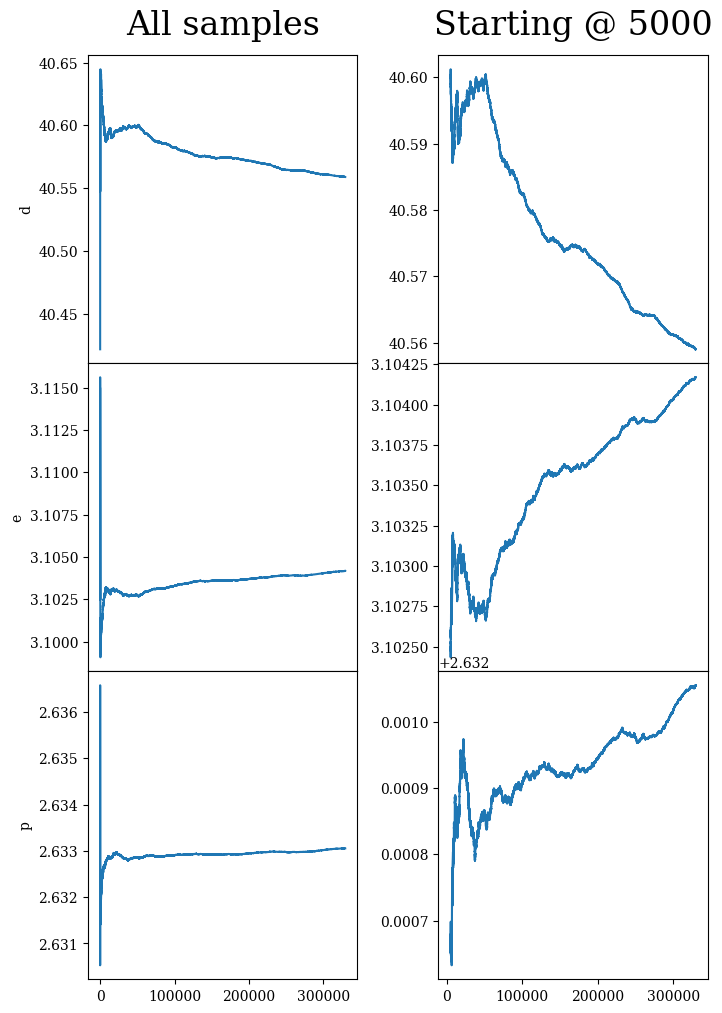

In [21]:
show(
    'mcmc_mao_ours_samples_20240709.h5', 
    param_keys=['d', 'e', 'p'], 
    log_prior_fn=None
)